In [310]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
import pydicom
from pydicom.data import get_testdata_files
import numpy as np
import imageio
import cv2
from PIL import Image
import imutils

# print(__doc__)

In [322]:
filename = 'data/ProstateX_Lesion_Seg/Prostatex0000/study/ep2d_diff_tra_DYNDIST_ADC/IM-0003-0010.dcm'
# filename = 'data/ProstateX_Lesion_Seg/Prostatex0159/study/ep2d_diff_tra_DYNDIST_MIX_ADC/IM-0647-0011.dcm'
dataset = pydicom.dcmread(filename)

bmp_name = 'data/ProstateX_Kyung_lesion_mask/Prostatex0000/IM-0003-0010+ep2d_diff_tra_DYNDIST_ADC+Unnamed.bmp'
# bmp_name = 'data/ProstateX_Kyung_lesion_mask/Prostatex0159/IM-0647-0011+ep2d_diff_tra_DYNDIST_MIX_ADC+3.bmp'
bmp = imageio.imread(bmp_name)


Filename.........: data/ProstateX_Lesion_Seg/Prostatex0000/study/ep2d_diff_tra_DYNDIST_ADC/IM-0003-0010.dcm
Storage type.....: 1.2.840.10008.5.1.4.1.1.4

Patient's name...: ProstateX-0000, 
Patient id.......: ProstateX-0000
Modality.........: MR
Study Date.......: 20110707
Image size.......: 128 x 84, 21504 bytes
Pixel spacing....: [2, 2]
Slice location...: -24.876396902258


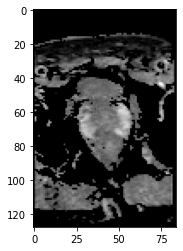

In [323]:
print()
print("Filename.........:", filename)
print("Storage type.....:", dataset.SOPClassUID)
print()

pat_name = dataset.PatientName
display_name = pat_name.family_name + ", " + pat_name.given_name
print("Patient's name...:", display_name)
print("Patient id.......:", dataset.PatientID)
print("Modality.........:", dataset.Modality)
print("Study Date.......:", dataset.StudyDate)

if 'PixelData' in dataset:
    rows = int(dataset.Rows)
    cols = int(dataset.Columns)
    print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
        rows=rows, cols=cols, size=len(dataset.PixelData)))
    if 'PixelSpacing' in dataset:
        print("Pixel spacing....:", dataset.PixelSpacing)

# use .get() if not sure the item exists, and want a default value if missing
print("Slice location...:", dataset.get('SliceLocation', "(missing)"))

# plot the image using matplotlib
im = dataset.pixel_array
plt.imshow(im, cmap='gray')
plt.show()

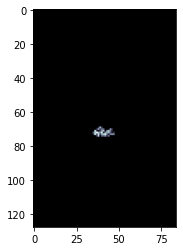

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [324]:
# Apply bitmask
applied_mask = bmp * im
plt.imshow(applied_mask, cmap=plt.cm.bone)
plt.show()

print(bmp)

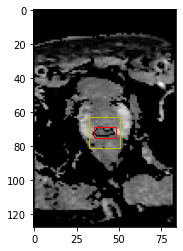

13
6


In [326]:
# Contours
contours, hierarchy = cv2.findContours(image = bmp, mode = cv2.RETR_TREE, method = cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key = cv2.contourArea, reverse = True)
c_0 = contours[0]

mask = np.ones(im.shape, dtype=np.uint8) * 255
im_outline = im.copy()
im_outline = cv2.drawContours(im_outline, contours, 0, (0, 255, 0), thickness=1)
plt.imshow(im_outline, cmap='gray')
ax = plt.gca()

# Get the current reference
x, y, w, h = cv2.boundingRect(c_0)   
rect = Rectangle((x, y),w,h,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)

# Outermost square is 1.4 times the longer rectangle length
s = max(w, h)*1.4
s_x = x-(s-w)/2
s_y = y-(s-h)/2
square = Rectangle((s_x, s_y),s,s,linewidth=1,edgecolor='y',facecolor='none')
ax.add_patch(square)

plt.show()
print(w)
print(h)

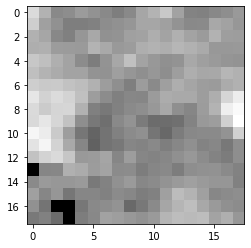

(18, 18)
[[1868 1518 1171 1207 1327 1244 1172 1079 1174 1417 1530 1709 1382 1123
  1102 1166 1213 1306]
 [1763 1364 1241 1079 1080 1103 1207 1238 1282 1422 1416 1365 1254 1168
  1176 1434 1388 1287]
 [1516 1418 1163 1099 1283 1433 1239 1257 1364 1383 1483 1398 1500 1399
  1329 1521 1353 1338]
 [1490 1504 1337 1326 1315 1533 1442 1310 1333 1483 1524 1486 1559 1510
  1452 1296 1296 1306]
 [1697 1631 1491 1400 1195 1072 1266 1426 1644 1399 1298 1227 1261 1432
  1356 1319 1277 1260]
 [1629 1532 1460 1389 1397 1265 1249 1359 1278 1226 1291 1217 1352 1488
  1431 1433 1558 1515]
 [1760 1716 1721 1653 1612 1516 1343 1220 1083 1335 1179 1359 1488 1410
  1344 1328 1457 1515]
 [1962 1797 1869 1811 1637 1345 1195 1091 1151 1143 1324 1468 1444 1442
  1343 1483 1826 2021]
 [1861 1736 1815 1828 1516 1093 1029 1102 1184 1218 1296 1434 1223 1149
  1331 1536 2043 2131]
 [1854 1968 1829 1654 1217 1024  952 1174 1267 1056  921  935  956 1125
  1306 1340 1780 2181]
 [2098 2015 1728 1341 1010  860  986 1103

In [327]:
# Crop image as square
s_y = round(s_y)
s_x = round(s_x)
s = round(s)

im_crop = im[s_y:s_y+s , s_x:s_x+s]
plt.imshow(im_crop, cmap='gray')
plt.show()
print(im_crop.shape)

print(im_crop)

FileNotFoundError: [Errno 2] No such file or directory: 'lesions_cropped/cropped_ADC_0000_IM-0003-0010.png'

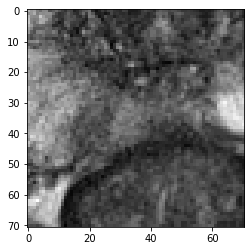

In [226]:
plt.imshow(im_crop, cmap='gray')
plt.savefig('lesions_cropped/cropped_ADC_0000_IM-0003-0010.png')
plt.show()